## Programme de parrainage

#### On regarde le contenu du jeu de données

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser
import datetime as dt

#### 1. Estimer l'impact du programme

In [0]:
df = pd.read_csv('referral.csv')
df.head()

,user_id,date,country,money_spent,is_referral,device_id
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH


#### On décompose la colonne date pour avoir les mois et les jours (du mois et de la semaine)

In [0]:
df.date = pd.to_datetime(df.date)

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Month_day'] = df['date'].dt.day
df['Week_day'] = df['date'].dt.day_name()

In [0]:
df.head()

,user_id,date,country,money_spent,is_referral,device_id,Year,Month,Month_day,Week_day
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG,2015,10,3,Saturday
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX,2015,10,3,Saturday
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG,2015,10,3,Saturday
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH,2015,10,3,Saturday
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH,2015,10,3,Saturday


In [0]:
df.Month.value_counts(), df.Month.value_counts().sum()

(10    50574
 11    46767
 Name: Month, dtype: int64, 97341)

On distingue mois (Octobre avant le programme et Novembre pendant la durée du programme). On crée deux datasets pour analyser l'impact du programme de parrainage sur la performance de l'entreprise

- Avant le 31 Octobre (df_Oct)
- Après le 31 Octobre inclus (df_Nov)

In [0]:
df_Oct = df[(df.Month == 10) & (df.Month_day < 31)]
len(df_Oct)

47341

In [0]:
df_Nov = df[~((df.Month == 10) & (df.Month_day < 31))]
len(df_Nov)

50000

In [0]:
print(df.Month.value_counts().sum())
print(len(df_Nov) + len(df_Oct))

97341
97341


#### On analyse les performances de l'entreprise avant le programme de parrainage




In [0]:
df_Oct.head()

,user_id,date,country,money_spent,is_referral,device_id,Year,Month,Month_day,Week_day
0,2,2015-10-03,FR,65,0,EVDCJTZMVMJDG,2015,10,3,Saturday
1,3,2015-10-03,CA,54,0,WUBZFTVKXGQQX,2015,10,3,Saturday
2,6,2015-10-03,FR,35,0,CBAPCJRTFNUJG,2015,10,3,Saturday
3,7,2015-10-03,UK,73,0,PRGXJZAJKMXRH,2015,10,3,Saturday
4,7,2015-10-03,MX,35,0,PRGXJZAJKMXRH,2015,10,3,Saturday


In [0]:
df_Oct.is_referral.value_counts()

0    47341
Name: is_referral, dtype: int64

In [0]:
df_Oct.user_id.nunique()

5000

In [0]:
df_Oct.user_id.value_counts()

1107    22
3670    21
3964    21
2236    21
4161    20
        ..
4400     1
1995     1
4592     1
4176     1
4381     1
Name: user_id, Length: 5000, dtype: int64

In [0]:
Mark_spent_Oct = 0
Perf_Oct = df_Oct.money_spent.sum() - Mark_spent_Oct
print("Coût du programme de parrainage: {} $".format(Mark_spent_Oct))
print("Chiffre d'Affaires: {} $".format(df_Oct.money_spent.sum()))
print("Différence: {} $".format(Perf_Oct))

Coût du programme de parrainage: 0 $
Chiffre d'Affaires: 2006396 $
Différence: 2006396 $


#### Regardons un peu la répartition de ces ventes par pays, par jour du mois et par jour de la semaine

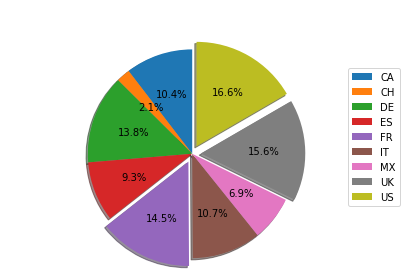

In [0]:
fig1 = df_Oct.groupby(df_Oct.country)['money_spent'].sum()

explode = (0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.1)
fig, ax = plt.subplots()
ax.pie(fig1, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode, radius=1.2)
fig.legend(fig1.index, loc="center right")
ax.set_title("Pourcentage du CA total par pays au mois d'Octobre", y=1.1, fontsize = 14, color='w')
plt.show()

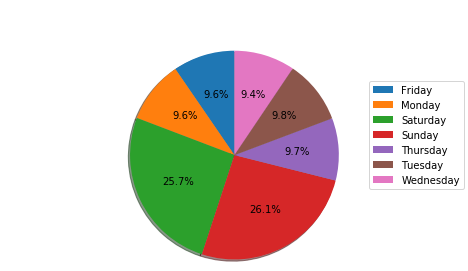

In [0]:
fig2 = df_Oct.groupby(df_Oct.Week_day)['money_spent'].sum()

explode = (0.0,0.0,0.0,0.0,0.0,0.0,0.0)
fig, ax = plt.subplots()
ax.pie(fig2, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode, radius=1.2)
fig.legend(fig2.index, loc="center right")
ax.set_title("Répartition du CA total par jour de la semaine au mois d'octobre", y=1.1, fontsize = 14, color='w')
plt.show()

#### Regardons maintenant ce qu'il se pendant le programme de parrainage

In [0]:
df_Nov.head()

,user_id,date,country,money_spent,is_referral,device_id,Year,Month,Month_day,Week_day
47341,21,2015-10-31,US,16,0,GHWEHPGTKPKZA,2015,10,31,Saturday
47342,22,2015-10-31,ES,14,0,YKGTJYXYDVYVR,2015,10,31,Saturday
47343,25,2015-10-31,IT,39,0,BCVEWGFBYJMMK,2015,10,31,Saturday
47344,26,2015-10-31,UK,84,0,PCXTGVBJDKPRE,2015,10,31,Saturday
47345,27,2015-10-31,IT,20,0,XSTMGVICVRWMH,2015,10,31,Saturday


In [0]:
len(df_Nov)

50000

In [0]:
df_Nov.is_referral.value_counts()

1    28017
0    21983
Name: is_referral, dtype: int64

In [0]:
df_Nov.query('is_referral == 1').groupby('user_id').sum().sort_values('is_referral', ascending=False)

,money_spent,is_referral,Year,Month,Month_day
user_id,,,,,
9803,653,10,20150,110,139
13785,428,9,18135,99,82
14761,390,9,18135,99,104
11451,355,9,18135,99,154
14237,474,8,16120,88,139
...,...,...,...,...,...
8676,61,1,2015,11,10
8677,55,1,2015,11,15
8678,69,1,2015,11,14


In [0]:
df_Nov.groupby('is_referral')['user_id'].nunique()

is_referral
0    11539
1    12715
Name: user_id, dtype: int64

In [0]:
df_Nov.groupby('is_referral')['user_id'].nunique()/df_Nov.groupby('is_referral')['user_id'].nunique().sum()

is_referral
0    0.475757
1    0.524243
Name: user_id, dtype: float64

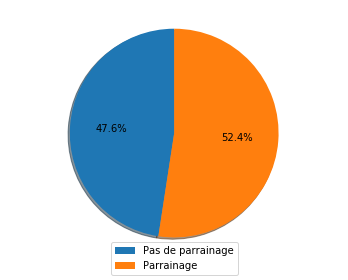

In [0]:
fig3 = df_Nov.groupby('is_referral')['user_id'].nunique()
fig3 = fig3.rename(index={0: 'Pas de parrainage', 1: 'Parrainage'})

explode = (0.0,0.0)
fig, ax = plt.subplots()
ax.pie(fig3, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode, radius=1.2)
fig.legend(fig3.index, loc="lower center")
ax.set_title("Pourcentage de clients parrainés/non parrainés", y=1.0, fontsize = 14, color='w')
plt.show()

In [0]:
df_Nov.groupby('is_referral')['money_spent'].sum()

is_referral
0    1028216
1    1315787
Name: money_spent, dtype: int64

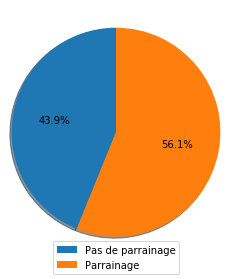

In [0]:
fig4 = df_Nov.groupby('is_referral')['money_spent'].sum()
fig4 = fig4.rename(index={0: 'Pas de parrainage', 1: 'Parrainage'})

explode = (0.0,0.0)
fig, ax = plt.subplots()
ax.pie(fig4, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode, radius=1.2)
fig.legend(fig4.index, loc="lower center")
ax.set_title("CA en fonction du parrainage", y=1.0, fontsize = 14, color='w')
plt.show()

In [0]:
Mark_spent_Nov = df_Nov.query('is_referral == 1').user_id.nunique()*10
Perf_Nov = df_Nov.money_spent.sum() - Mark_spent_Nov
print("Coût du programme de parrainage {} $".format(Mark_spent_Nov))
print("Ventes enregistrées {} $".format(df_Nov.money_spent.sum()))
print("Différence {} $".format(Perf_Nov))

Coût du programme de parrainage 127150 $
Ventes enregistrées 2344003 $
Différence 2216853 $


#### Impact du programme de parrainage

In [0]:
Diff_perf = round((Perf_Nov - Perf_Oct)/Perf_Oct*100, 2)
print("Le programme permet de faire environ {} % de ventes en plus".format(Diff_perf))
print("Le programme de parrainage a coûté  {} $ pour {} $ de gains en plus par rapport au mois d'Octobre".format(Mark_spent_Nov, Perf_Nov - Perf_Oct))
print("Le programme a donc rapporté {} $ ".format(- Mark_spent_Nov + (Perf_Nov - Perf_Oct)))

Le programme permet de faire environ 10.49 % de ventes en plus
Le programme de parrainage a coûté  127150 $ pour 210457 $ de gains en plus par rapport au mois d'Octobre
Le programme a donc rapporté 83307 $ 


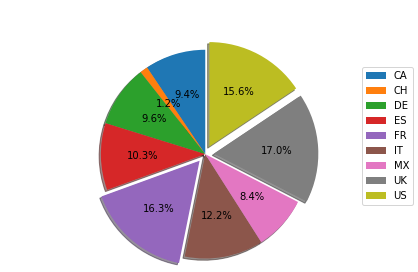

In [0]:
fig5 = df_Nov.groupby(df_Nov.country)['money_spent'].sum()

explode = (0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.1)
fig, ax = plt.subplots()
ax.pie(fig5, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode, radius=1.2)
fig.legend(fig5.index, loc="center right")
ax.set_title("Pourcentage du CA total par pays au mois de Novembre", y=1.1, fontsize = 14, color='w')
plt.show()

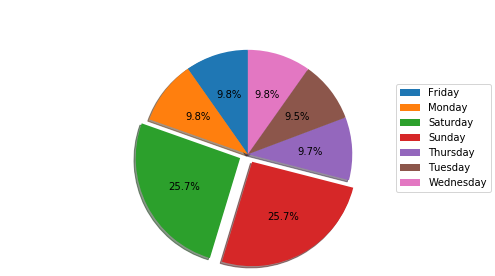

In [0]:
fig6 = df_Nov.groupby(df_Nov.Week_day)['money_spent'].sum()

explode = (0.0,0.0,0.1,0.1,0.0,0.0,0.0)
fig, ax = plt.subplots()
ax.pie(fig6, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode, radius=1.2)
fig.legend(fig6.index, loc="center right")
ax.set_title("Répartition des ventes par jour de la semaine au mois de Novembre", y=1.1, fontsize = 14, color='w')
plt.show()

In [0]:
fig5 = df_Nov.groupby(df_Nov.country)['money_spent'].sum()

explode = (0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.1)
fig, ax = plt.subplots()
ax.pie(fig5, autopct='%1.1f%%', shadow=True, startangle=90, explode=explode, radius=1.2)
fig.legend(fig5.index, loc="center right")
ax.set_title("Pourcentage du CA total par pays au mois de Novembre", y=1.1, fontsize = 14, color='w')
plt.show()

#### 2. Compte tenu de ce que vous trouverez, faites des recommendations sur les prochaines étapes à suivre

#### 3. Le referral program n'a pas été mis en place de manière rigoureuse. Pourriez vous proposer une manière plus statistique de mettre en place le prochain programme ? Donnez en tous cas les risques que cela représente

- Certains utilisateurs déjà clients en octobre sont parrainés en novembre
